<center><img src="https://www.aionlinecourse.com/uploads/blog/description/2022/01/15_air_ticket_price_prediction.png" style="width: 600px;"/>

# Flight Booking Price Prediction

Flight booking refers to the process of reserving a seat on a commercial airline for a specific journey. It involves selecting a departure and arrival location, specifying travel dates, choosing a preferred airline, and securing a ticket for a particular class or cabin. The entire process is facilitated through various channels, including airline websites, travel agencies, online travel platforms, or mobile applications.

## Objective
Our objective is to analyze the flight
booking dataset obtained from a
platform which is used to book flight
tickets. A thorough study of the data
will aid in the discovery of valuable
insights that will be of enormous
value to passengers. Here we apply EDA,
statistical methods and Machine
learning algorithms in order to get
meaningful information from it.

### Agenda :
1. Importing the libraries
2. Loading the Dataset
3. Data Visualization
4. Encoding
3. Feature Selection
6. Data Manipulation
7. Implementing ML Algorithms
8. Conclusion

#### 1. Importing the libraries
We start off this project by importing all the necessary
libraries that will be required for the process.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.preprocessing import LabelEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_percentage_error
from sklearn import metrics

#### 2. Loading the Dataset
Loading the data and removing unnecessary column from the dataframe

In [2]:
df = pd.read_csv('Flight_Booking.csv')
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [3]:
df = df.drop(columns=['Unnamed: 0'])
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [4]:
# Checking the shape of a dataframe and datatypes of all columns along with calculating the statistical data

In [5]:
df.shape

(300153, 11)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


In [7]:
df.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


In [8]:
#Checking out the missing values in a dataframe

In [9]:
df.isnull().sum()

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [10]:
#Checking out the duplicate values in a dataframe

In [11]:
df.duplicated().sum()

0

#### 3. Data Visualization

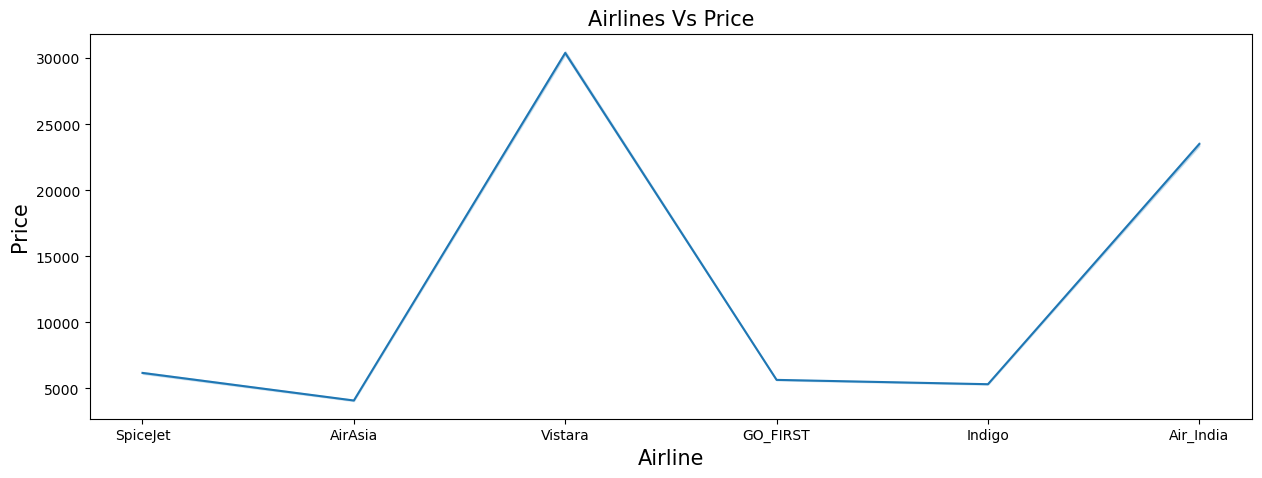

In [12]:
# Airlines Vs Price
plt.figure(figsize=(15,5))
sns.lineplot(x=df['airline'],y=df['price'])
plt.title('Airlines Vs Price',fontsize=15)
plt.xlabel('Airline',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

**Inference:** There is a variation in price with
different airlines

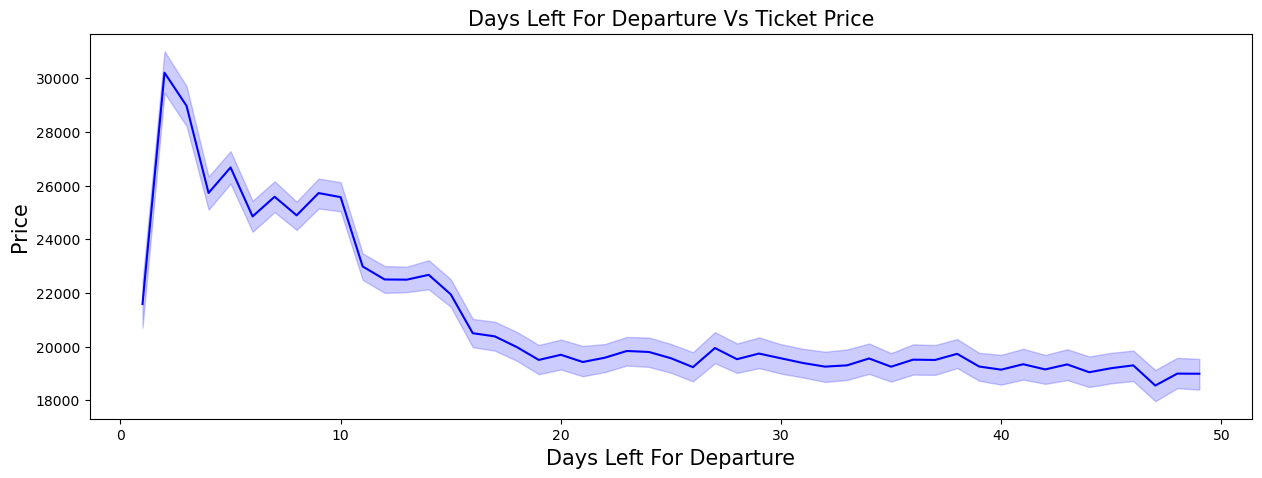

In [13]:
#Days Left For Departure Vs Ticket Price
plt.figure(figsize=(15,5))
sns.lineplot(x=df['days_left'],y=df['price'],color='blue')
plt.title('Days Left For Departure Vs Ticket Price',fontsize=15)
plt.xlabel('Days Left For Departure',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

**Inference:** The price of the ticket
increases as the days left for
departure decreases 

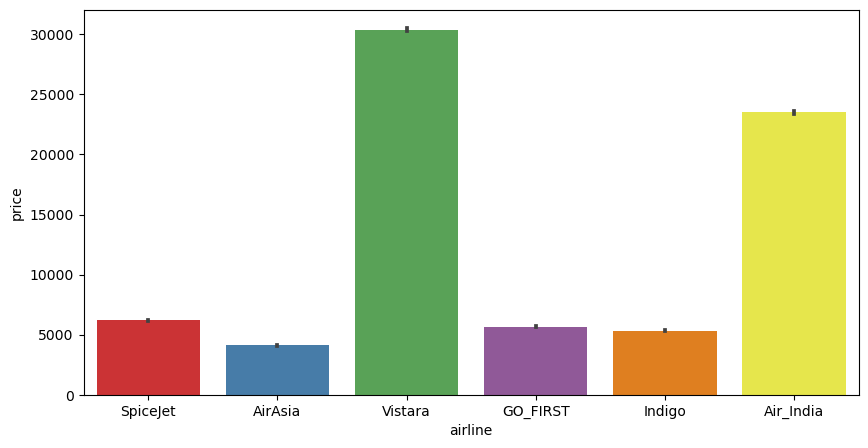

In [14]:
#Price range of all the flights
plt.figure(figsize=(10,5));
sns.barplot(x='airline',y='price',data=df,palette='Set1')
plt.show()

**Inference:** Vistara airline has the highest ticket price

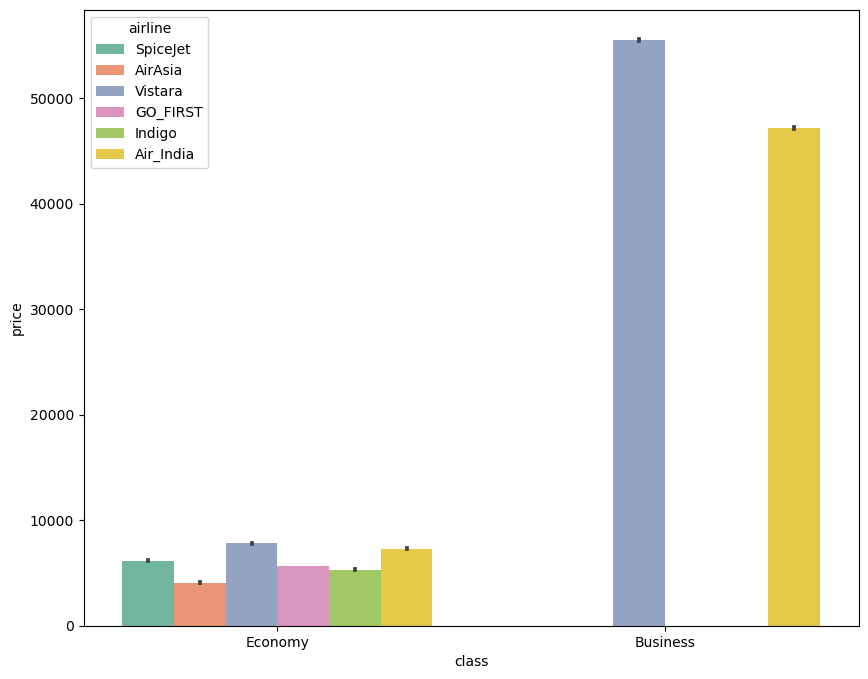

In [15]:
#Range of price of all the flights of Economy and Business class
plt.figure(figsize=(10,8));
sns.barplot(x='class',y='price',data=df,hue='airline',palette='Set2')
plt.show()

**Inference:** Vistara Airline has highest ticket price for both Economy and Business class

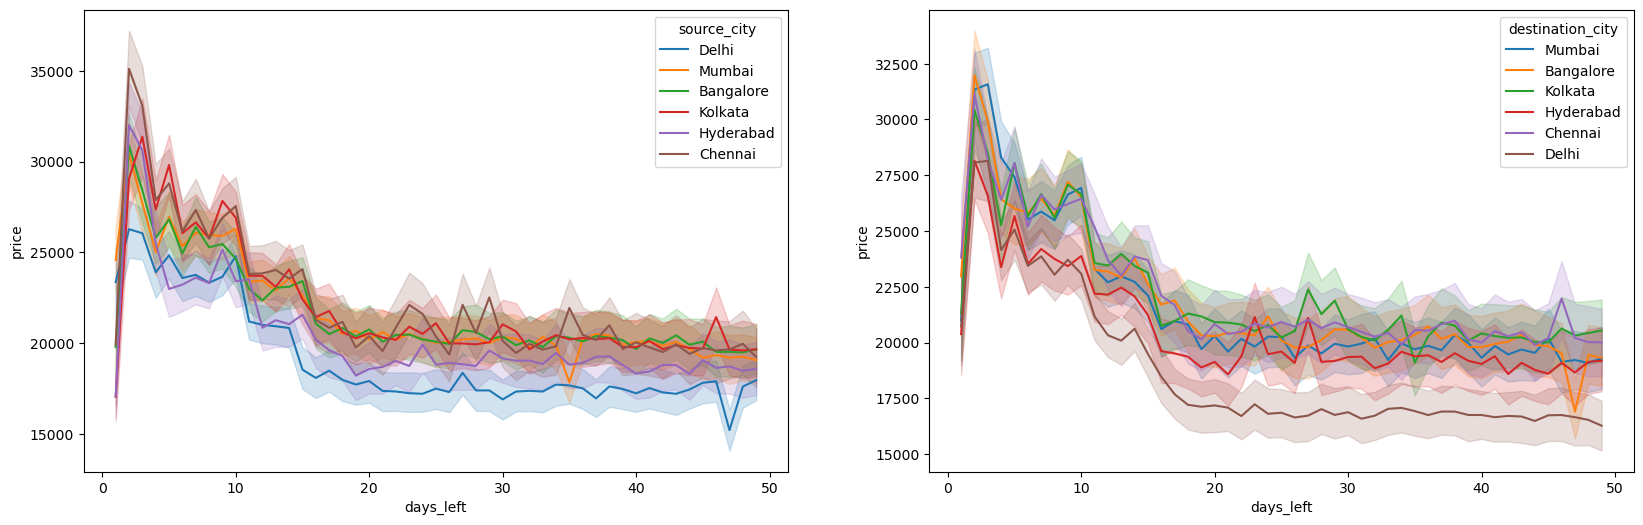

In [16]:
#Range of price of flights with source and destination city according to the days left
fig,ax=plt.subplots(1,2,figsize=(20,6))
sns.lineplot(x='days_left',y='price',data=df,hue='source_city',ax=ax[0])
sns.lineplot(x='days_left',y='price',data=df,hue='destination_city',ax=ax[1])
plt.show()

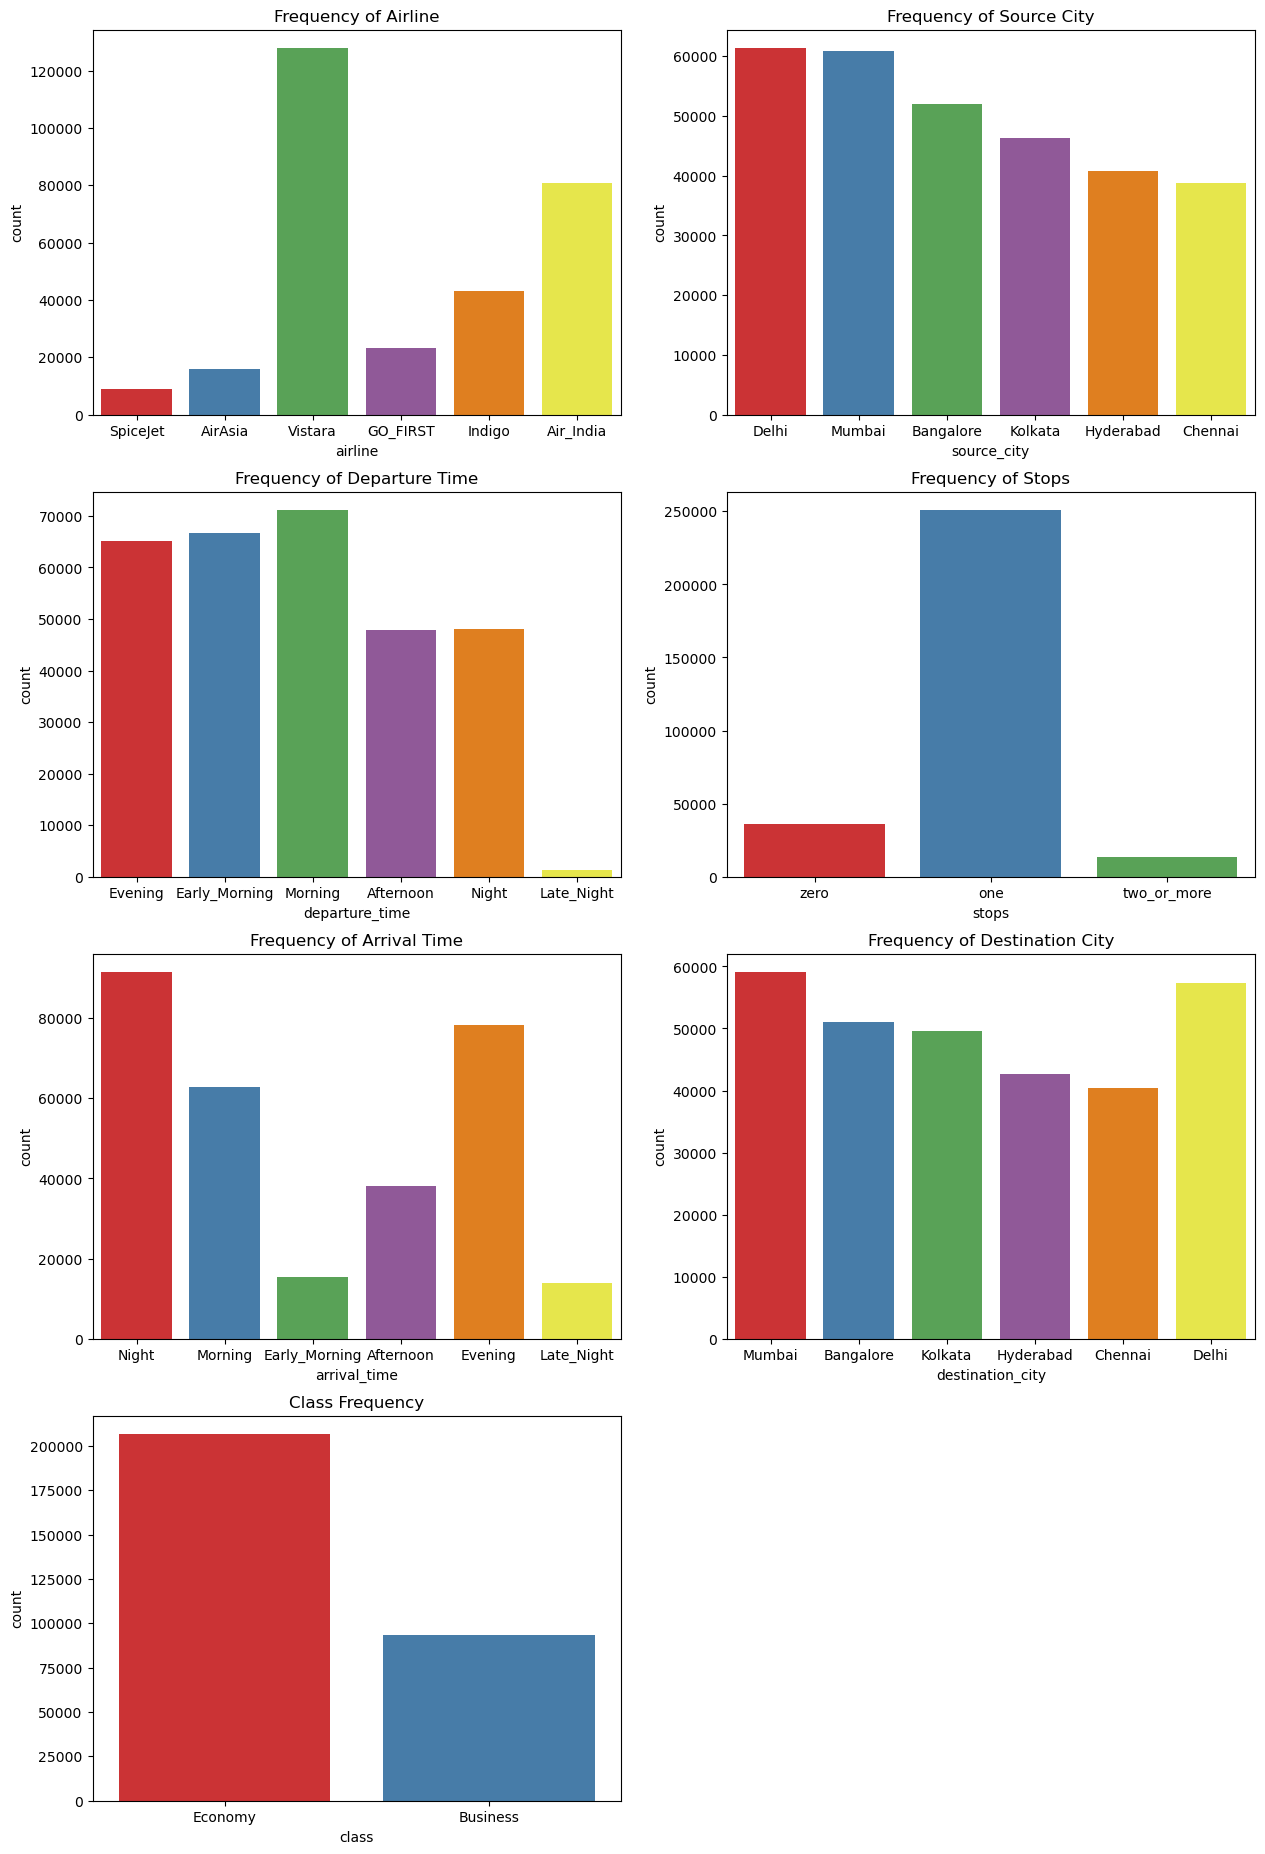

In [17]:
#Visualization of categorical features with countplot

plt.figure(figsize=(15,23))

plt.subplot(4,2,1)
sns.countplot(x='airline',data=df,palette='Set1')
plt.title('Frequency of Airline')

plt.subplot(4,2,2)
sns.countplot(x='source_city',data=df,palette='Set1')
plt.title('Frequency of Source City')


plt.subplot(4,2,3)
sns.countplot(x='departure_time',data=df,palette='Set1')
plt.title('Frequency of Departure Time')

plt.subplot(4,2,4)
sns.countplot(x='stops',data=df,palette='Set1')
plt.title('Frequency of Stops')

plt.subplot(4,2,5)
sns.countplot(x='arrival_time',data=df,palette='Set1')
plt.title('Frequency of Arrival Time')

plt.subplot(4,2,6)
sns.countplot(x='destination_city',data=df,palette='Set1')
plt.title('Frequency of Destination City')

plt.subplot(4,2,7)
sns.countplot(x='class',data=df,palette='Set1')
plt.title('Class Frequency')

plt.show()

**Inference:** 
+ Vistara airline has the most number of flights
+ Delhi is the source city most of the time
+ Mostly morning is the departure time 
+ Maximum number of flights have one stop
+ Mostly night is the arrival time
+ Mumbai is the destination city most of the time
+ Maximum nubber of seats are of Economy class

#### 4. Encoding

**Label Encoding:** Performing One Hot Encoding for categorical features of a
dataframe

In [18]:
le =LabelEncoder()

In [19]:
df['airline']=le.fit_transform(df['airline'])
df['flight'] = le.fit_transform(df['flight'])
df['source_city']=le.fit_transform(df['source_city'])
df['departure_time']=le.fit_transform(df['departure_time'])
df['stops']=le.fit_transform(df['stops'])
df['arrival_time']=le.fit_transform(df['arrival_time'])
df['destination_city']=le.fit_transform(df['destination_city'])
df['class']=le.fit_transform(df['class'])

In [20]:
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,4,1408,2,2,2,5,5,1,2.17,1,5953
1,4,1387,2,1,2,4,5,1,2.33,1,5953
2,0,1213,2,1,2,1,5,1,2.17,1,5956
3,5,1559,2,4,2,0,5,1,2.25,1,5955
4,5,1549,2,4,2,4,5,1,2.33,1,5955


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  int32  
 1   flight            300153 non-null  int32  
 2   source_city       300153 non-null  int32  
 3   departure_time    300153 non-null  int32  
 4   stops             300153 non-null  int32  
 5   arrival_time      300153 non-null  int32  
 6   destination_city  300153 non-null  int32  
 7   class             300153 non-null  int32  
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int32(8), int64(2)
memory usage: 16.0 MB


#### 5. Feature Selection

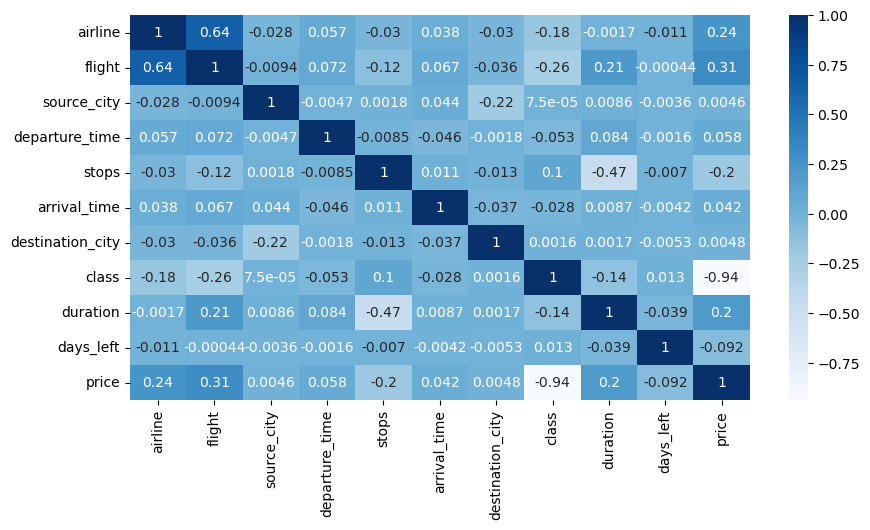

In [22]:
#Plotting the correlation graph to see the correlation between features and dependent variable.
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True,cmap='Blues')
plt.show()

In [23]:
col_list=[]
for col in df.columns:
    if ((df[col].dtype != 'object') & (col != 'price')):
        col_list.append(col)
        
X = df[col_list]
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i)for i in range(len(X.columns))]

print(vif_data)

            feature        VIF
0           airline   6.701818
1            flight  12.675046
2       source_city   2.969540
3    departure_time   2.806009
4             stops   1.437326
5      arrival_time   3.784873
6  destination_city   2.918792
7             class   2.852072
8          duration   4.754588
9         days_left   4.071591


In [24]:
# Dropping the flight column.

df = df.drop(columns=['flight'])

col_list=[]
for col in df.columns:
    if ((df[col].dtype != 'object') & (col != 'price')):
        col_list.append(col)
        
X = df[col_list]
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i)for i in range(len(X.columns))]

print(vif_data)

            feature       VIF
0           airline  3.393124
1       source_city  2.927766
2    departure_time  2.779427
3             stops  1.426614
4      arrival_time  3.684550
5  destination_city  2.885337
6             class  2.849370
7          duration  4.113876
8         days_left  3.976790


**Inference:** All features are having VIF
less than 5. 

#### 6. Data Manipulation

In [25]:
X = df.drop(columns=['price'])
y = df['price'] # target column

In [26]:
# split data into test and train
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [27]:
x_train

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left
148417,1,4,0,0,4,1,1,19.42,6
36879,3,2,0,1,5,1,1,7.00,13
274531,1,4,0,0,0,1,0,21.17,44
166397,5,3,5,0,1,0,1,10.25,11
272722,5,4,5,0,5,1,0,26.50,5
...,...,...,...,...,...,...,...,...,...
119879,5,4,2,0,0,2,1,20.50,2
259178,5,0,5,0,5,1,0,25.42,7
131932,1,4,5,0,4,5,1,13.67,29
146867,2,4,0,0,5,3,1,8.33,39


In [28]:
# Scaling the data
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

#### 7. Implementing ML Algorithms

**1. Linear Regression** to
predict the price of a flight.

In [29]:
lr = LinearRegression()

In [30]:
lr.fit(x_train,y_train)

LinearRegression()

In [31]:
lr_y_pred = lr.predict(x_test)

In [32]:
difference = pd.DataFrame(np.c_[y_test,lr_y_pred],columns=['Actual_Value','Predicted_Value'])
difference

,Actual_Value,Predicted_Value
0,7366.0,4585.880510
1,64831.0,52842.077073
2,6195.0,7877.980184
3,60160.0,56120.138579
4,6578.0,6663.204177
...,...,...
60026,5026.0,5829.230618
60027,3001.0,539.222230
60028,6734.0,5848.965500
60029,5082.0,-1498.061918


In [33]:
r2_lr = r2_score(y_test,lr_y_pred)
r2_lr =  round(r2_lr, 4)
r2_lr

0.9046

In [34]:
mean_abs_error_lr = metrics.mean_absolute_error(y_test,lr_y_pred)
mean_abs_error_lr =  round(mean_abs_error_lr, 4)
mean_abs_error_lr 

4624.9949

In [35]:
mape_lr = mean_absolute_percentage_error(y_test,lr_y_pred)
mape_lr = round(mape_lr, 4)
mape_lr

0.4354

In [36]:
mean_sq_error_lr = metrics.mean_squared_error(y_test,lr_y_pred)
mean_sq_error_lr = round(mean_sq_error_lr, 4)
mean_sq_error_lr 

49200540.2937

In [37]:
root_mean_sq_error_lr = np.sqrt(metrics.mean_squared_error(y_test,lr_y_pred))
root_mean_sq_error_lr = round(root_mean_sq_error_lr, 4)
root_mean_sq_error_lr

7014.3097

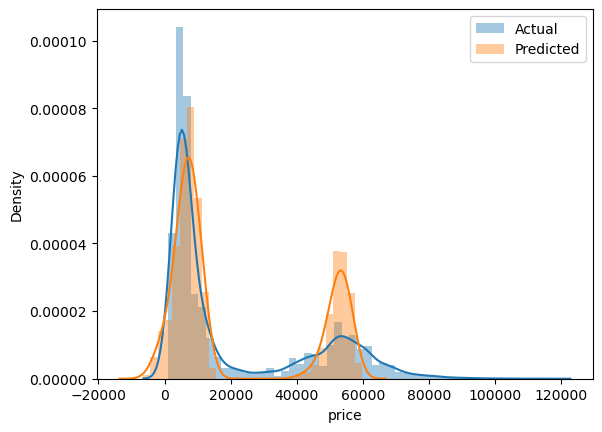

In [38]:
# Plotting the graph of actual and predicted price of flight
sns.distplot(y_test,label = 'Actual')
sns.distplot(lr_y_pred,label = 'Predicted')
plt.legend()
plt.show()

**Inference:** Mean absolute percentage 
error is 43.5 percent and RMSE 
is 7014 for the 
linear regression model

**2. Decision Tree Regressor**

In [39]:
dt = DecisionTreeRegressor()

In [40]:
dt.fit(x_train,y_train)

DecisionTreeRegressor()

In [41]:
dt_y_pred = dt.predict(x_test)

In [42]:
difference = pd.DataFrame(np.c_[y_test,dt_y_pred],columns=['Actual_Value','Predicted_Value'])
difference

,Actual_Value,Predicted_Value
0,7366.0,7366.0
1,64831.0,72783.0
2,6195.0,6195.0
3,60160.0,60160.0
4,6578.0,6578.0
...,...,...
60026,5026.0,5301.0
60027,3001.0,3001.0
60028,6734.0,6314.0
60029,5082.0,5082.0


In [43]:
r2_dt = r2_score(y_test,dt_y_pred)
r2_dt = round(r2_dt, 4)
r2_dt

0.9756

In [44]:
mean_abs_error_dt = metrics.mean_absolute_error(y_test,dt_y_pred)
mean_abs_error_dt = round(mean_abs_error_dt, 4)
mean_abs_error_dt

1173.0382

In [45]:
mape_dt = mean_absolute_percentage_error(y_test,dt_y_pred)
mape_dt =  round(mape_dt , 4)
mape_dt 

0.0737

In [46]:
mean_sq_error_dt = metrics.mean_squared_error(y_test,dt_y_pred)
mean_sq_error_dt = round(mean_sq_error_dt, 4)
mean_sq_error_dt

12564248.3535

In [47]:
root_mean_sq_error_dt = np.sqrt(metrics.mean_squared_error(y_test,dt_y_pred))
root_mean_sq_error_dt = round(root_mean_sq_error_dt, 4)
root_mean_sq_error_dt

3544.6083

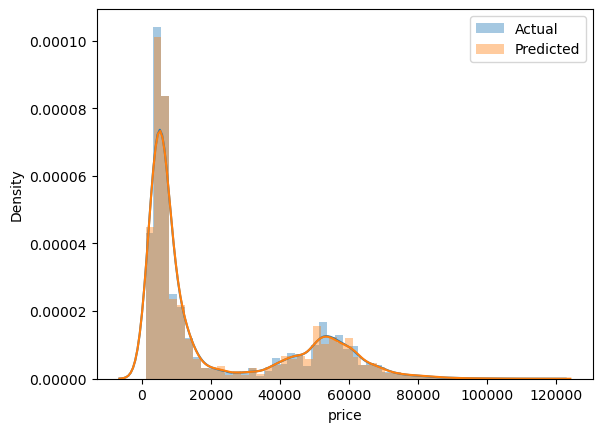

In [48]:
# Plotting the graph of actual and predicted price of flight
sns.distplot(y_test,label = 'Actual')
sns.distplot(dt_y_pred,label = 'Predicted')
plt.legend()
plt.show()

**Inference:** Mean absolute percentage 
error is 7.3 percent and RMSE 
is 3538 which is less than the 
linear regression model

**3. Random Forest**

In [49]:
rf = RandomForestRegressor()

In [50]:
rf.fit(x_train,y_train)

RandomForestRegressor()

In [51]:
rf_y_pred = rf.predict(x_test)

In [52]:
difference = pd.DataFrame(np.c_[y_test,rf_y_pred],columns=['Actual_Value','Predicted_Value'])
difference

,Actual_Value,Predicted_Value
0,7366.0,6561.09
1,64831.0,70559.80
2,6195.0,6195.00
3,60160.0,60799.86
4,6578.0,6560.16
...,...,...
60026,5026.0,5181.22
60027,3001.0,2995.28
60028,6734.0,6450.65
60029,5082.0,4358.67


In [53]:
r2_rf = r2_score(y_test,rf_y_pred)
r2_rf = round(r2_rf, 4)
r2_rf

0.9849

In [54]:
mean_abs_error_rf = metrics.mean_absolute_error(y_test,rf_y_pred)
mean_abs_error_rf = round(mean_abs_error_rf, 4)
mean_abs_error_rf

1090.6196

In [55]:
mape_rf = mean_absolute_percentage_error(y_test,rf_y_pred)
mape_rf = round(mape_rf, 4)
mape_rf

0.0704

In [56]:
mean_sq_error_rf = metrics.mean_squared_error(y_test,rf_y_pred)
mean_sq_error_rf = round(mean_sq_error_rf, 4)
mean_sq_error_rf

7765791.9204

In [57]:
root_mean_sq_error_rf = np.sqrt(metrics.mean_squared_error(y_test,rf_y_pred))
root_mean_sq_error_rf = round(root_mean_sq_error_rf, 4)
root_mean_sq_error_rf

2786.7171

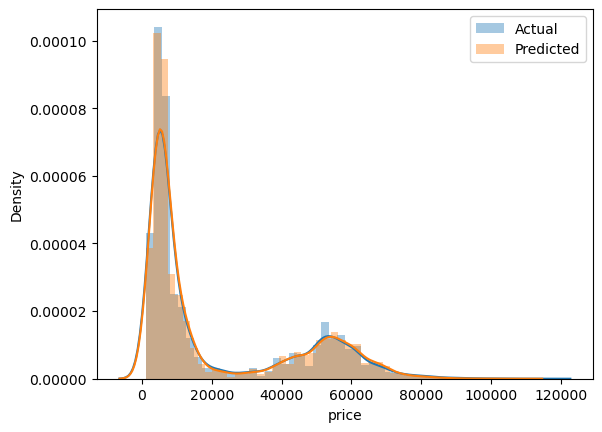

In [58]:
# Plotting the graph of actual and predicted price of flight
sns.distplot(y_test,label = 'Actual')
sns.distplot(rf_y_pred,label = 'Predicted')
plt.legend()
plt.show()

**Inference:** Mean absolute percentage 
error is 7.0 percent and RMSE 
is 2782 which is less than the 
linear regression and decision 
tree model

In [59]:
#Let us create first create a table to store the results of various models 

Evaluation_Results = pd.DataFrame(np.zeros((3,5)), columns=['r2_score','mean_absolute_error','mean_absolute_percentage_error', 'mean_squared_error','root_mean_sq_error'])
Evaluation_Results.index=['Linear Regression (LR)','Decision Tree Regressor (DT)','Random Forest Regressor (RF)']

In [60]:
lr_results = [r2_lr, mean_abs_error_lr,mape_lr, mean_sq_error_lr,root_mean_sq_error_lr]
dt_results = [r2_dt, mean_abs_error_dt,mape_dt, mean_sq_error_dt,root_mean_sq_error_dt]
rf_results = [r2_rf, mean_abs_error_rf,mape_rf, mean_sq_error_rf,root_mean_sq_error_rf]

# Update the DataFrame
Evaluation_Results.loc['Linear Regression (LR)'] = lr_results
Evaluation_Results.loc['Decision Tree Regressor (DT)'] = dt_results
Evaluation_Results.loc['Random Forest Regressor (RF)'] = rf_results


In [61]:
Evaluation_Results

,r2_score,mean_absolute_error,mean_absolute_percentage_error,mean_squared_error,root_mean_sq_error
Linear Regression (LR),0.9046,4624.9949,0.4354,4.920054e+07,7014.3097
Decision Tree Regressor (DT),0.9756,1173.0382,0.0737,1.256425e+07,3544.6083
Random Forest Regressor (RF),0.9849,1090.6196,0.0704,7.765792e+06,2786.7171


#### 8. Conclusion

+ Among the models considered, the Random Forest Regressor (RF) consistently outperformed both Linear Regression and Decision Tree Regressor across various performance metrics. The high R-squared score and lower error metrics indicate its effectiveness in predicting flight prices.
+ This analysis provides a foundation for making informed decisions in the context of flight booking price prediction, and future work may involve exploring more advanced modeling techniques and incorporating additional relevant features.